In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [2]:
data=pd.read_csv('data_for_lr.csv')
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data Processing

In [5]:
data=data.dropna()
print("The shape of the Dataet is : ",data.shape)

The shape of the Dataet is :  (699, 2)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Splitting The Dataset

In [7]:
#Training the input and output
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

#Validation input and output dataset
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [8]:
print(f"Training Input Shape={train_input.shape}")
print(f"Training Output Shape={train_output.shape}")
print(f"Test Input Shape={test_input.shape}")
print(f"Test output shape={test_output.shape}")

Training Input Shape=(500, 1)
Training Output Shape=(500, 1)
Test Input Shape=(199, 1)
Test output shape=(199, 1)


# Linear Regression

Forward Propagation 

f(x)=m*x +c

In [9]:
def forward_propagation(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    
    predictions=np.multiply(m,train_input)+c
    return predictions

# Cost function
summation(1/2n*(y-f(x)^2)

In [10]:
def cost_function(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost

# Gradient Descent for Backpropagation

#df=summf(x)-y/n
dm=df*x
dc=dc*1

In [11]:
def backward_propagation(train_input,train_output,predictions):
    derivatives=dict()
    df=predictions-train_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    
    derivatives["dm"]= dm
    derivatives["dc"]= dc
    
    return derivatives
    

# Update Parameters

m= m - (learning_rate*dm)
c= c- (learning_rate *dc)

In [12]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"]=parameters["m"] -learning_rate * derivatives['dm']
    parameters["c"]=parameters['c'] -learning_rate *derivatives['dc']
    
    return parameters


# Model Training

In [15]:
def train(train_input,train_output,learning_rate,iters):
    
    #random Parameters
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    plt.figure()
    
    loss=list()
    
    #iteration
    for i in range(iters):
        #forward Propagation
        predictions=forward_propagation(train_input,parameters)
        
        #cost
        cost=cost_function(predictions,train_output)
        loss.append(cost)
        print(f"Iteration ={i+1}, Loss={cost}")
        
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,predictions,"+",label="Training")
        legend=ax.legend()
        
        fig,ax=plt.subplots()
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,predictions,"+",label="Training")
        plt.show()
        
        
        #backward propagation
        derivatives=backward_propagation(train_input,train_output,predictions)
        
        #update the parametrs
        parameters=update_parameters(parameters,derivatives,learning_rate)
        
        
    return parameters,loss
        
    

# Training

Iteration =1, Loss=9.87313081990092


<Figure size 432x288 with 0 Axes>

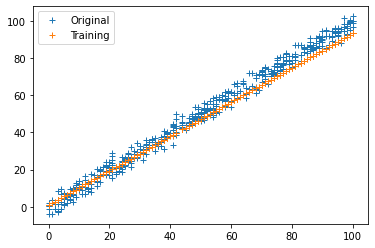

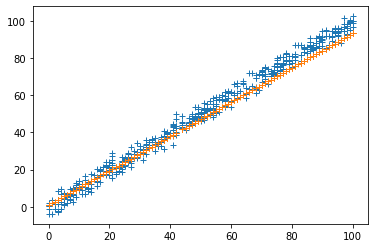

Iteration =2, Loss=6.713755005228013


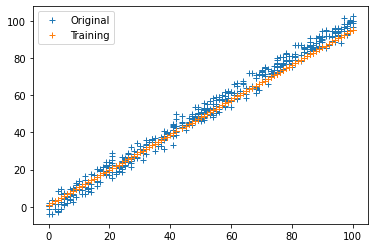

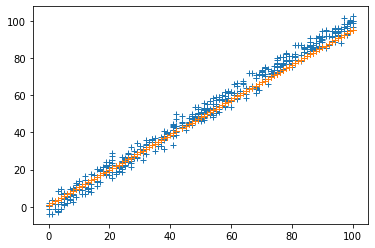

Iteration =3, Loss=5.280337758085923


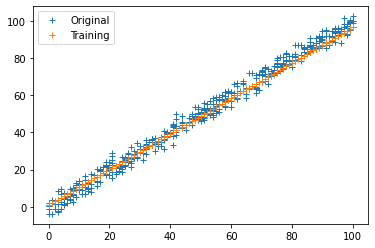

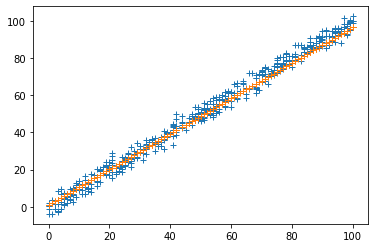

Iteration =4, Loss=4.629989825024289


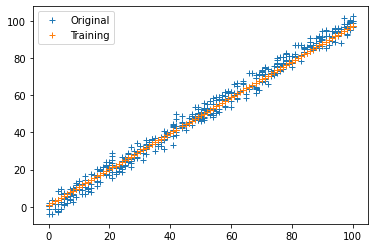

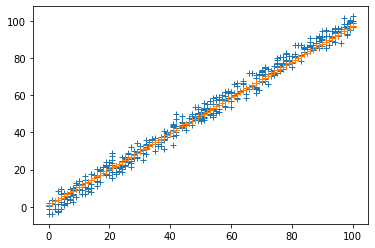

Iteration =5, Loss=4.3349213073696635


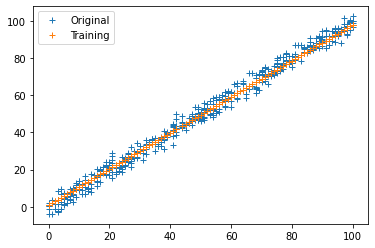

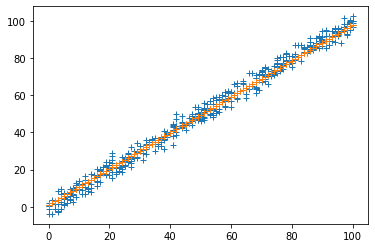

Iteration =6, Loss=4.201043454256166


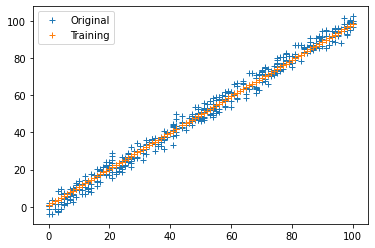

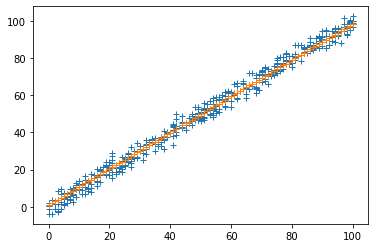

Iteration =7, Loss=4.140297984435235


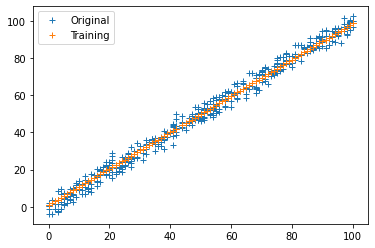

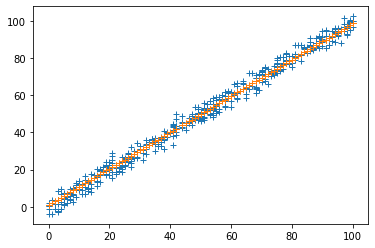

Iteration =8, Loss=4.112732758167407


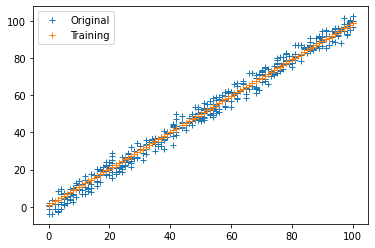

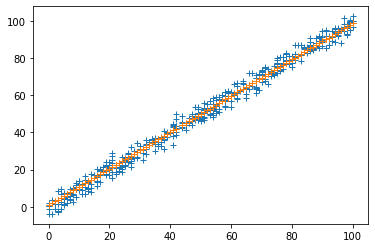

Iteration =9, Loss=4.100221445400241


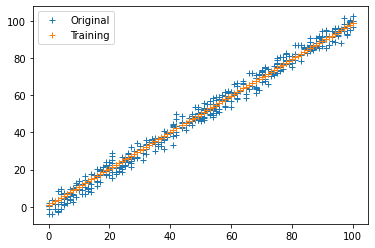

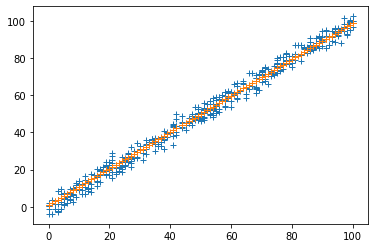

Iteration =10, Loss=4.094540110111453


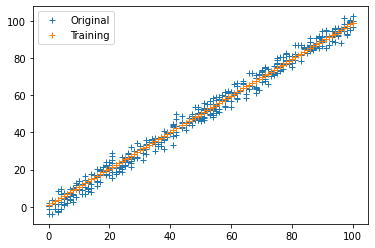

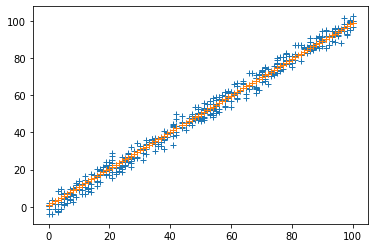

Iteration =11, Loss=4.091957543418558


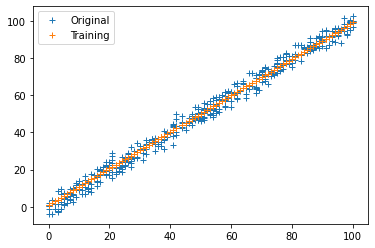

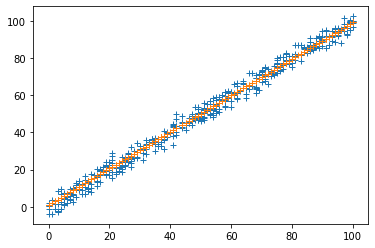

Iteration =12, Loss=4.090780891718715


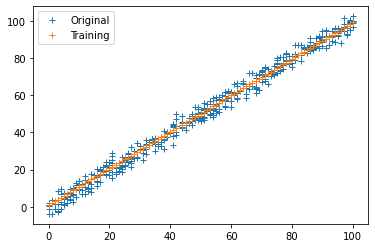

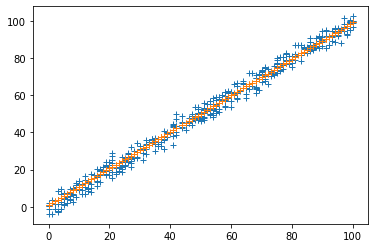

Iteration =13, Loss=4.0902421054572295


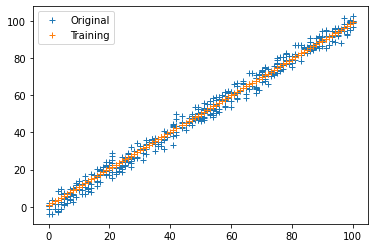

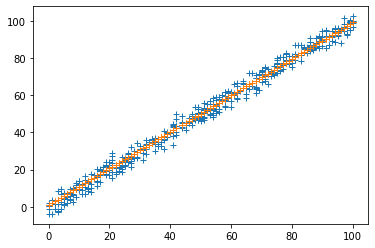

Iteration =14, Loss=4.089992719700399


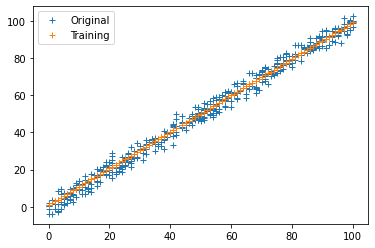

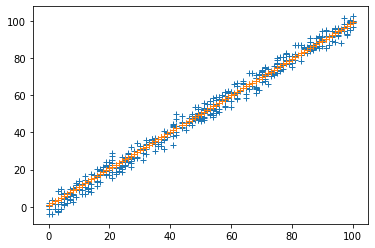

Iteration =15, Loss=4.089874635521819


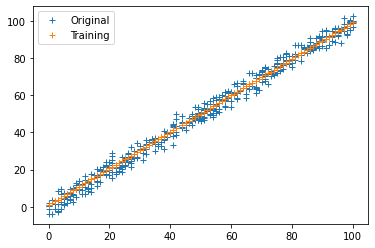

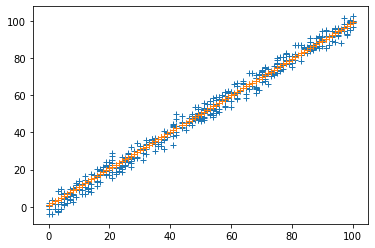

Iteration =16, Loss=4.089816123263449


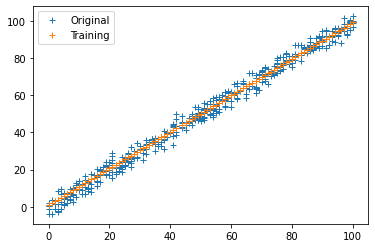

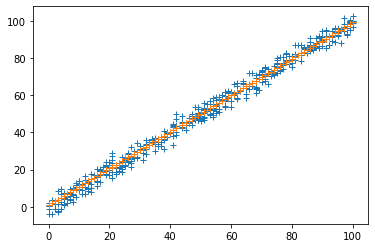

Iteration =17, Loss=4.089784639099973


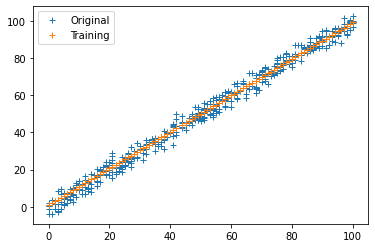

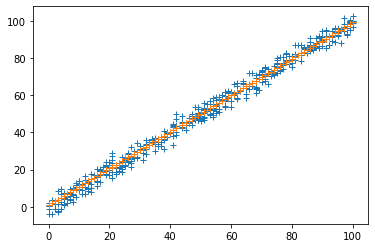

Iteration =18, Loss=4.089765417861782


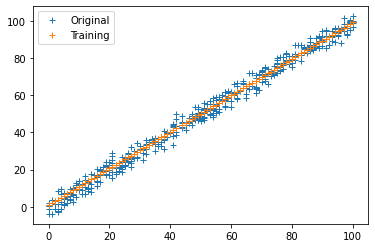

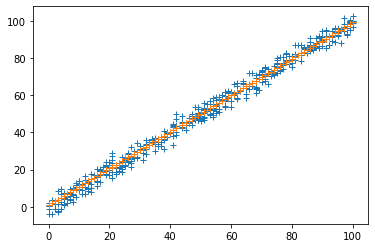

Iteration =19, Loss=4.089751760575065


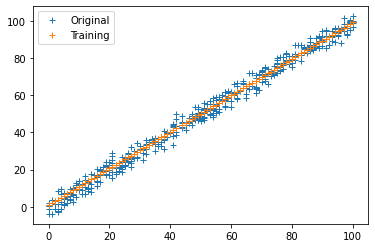

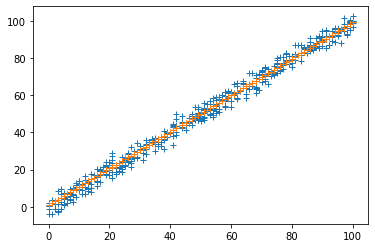

Iteration =20, Loss=4.089740627907963


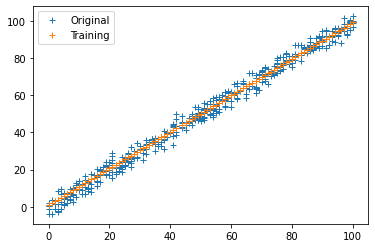

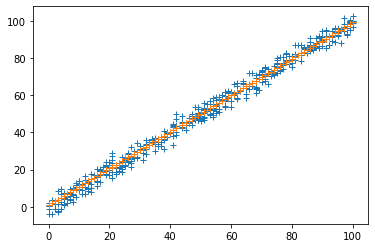

In [16]:
parameters,loss=train(train_input,train_output,0.0001,20)

In [ ]:
print(parameters)

# Model Prediction

In [17]:
loss

[9.87313081990092,
 6.713755005228013,
 5.280337758085923,
 4.629989825024289,
 4.3349213073696635,
 4.201043454256166,
 4.140297984435235,
 4.112732758167407,
 4.100221445400241,
 4.094540110111453,
 4.091957543418558,
 4.090780891718715,
 4.0902421054572295,
 4.089992719700399,
 4.089874635521819,
 4.089816123263449,
 4.089784639099973,
 4.089765417861782,
 4.089751760575065,
 4.089740627907963]

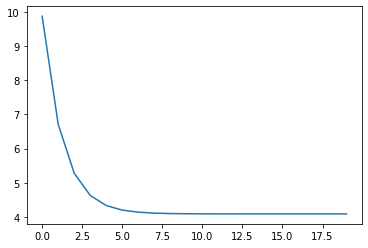

In [18]:
plt.plot(loss)

# Prediction

In [23]:
test_predictions=test_input*parameters["m"]+parameters["c"]

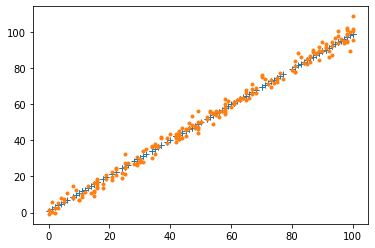

In [26]:
plt.plot(test_input,test_predictions,"+")
plt.plot(test_input,test_output,".")
plt.show()

# Cost Prediction 

so whatever our cost prediciton is ,it is close upto +-4

In [27]:
cost_function(test_output,test_predictions)

4.060348205718887